In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
df = pd.read_csv("Mall_Customers.csv")

In [9]:
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

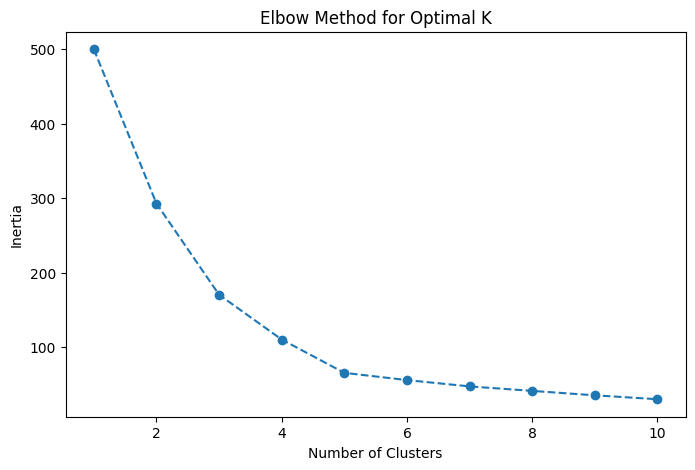

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

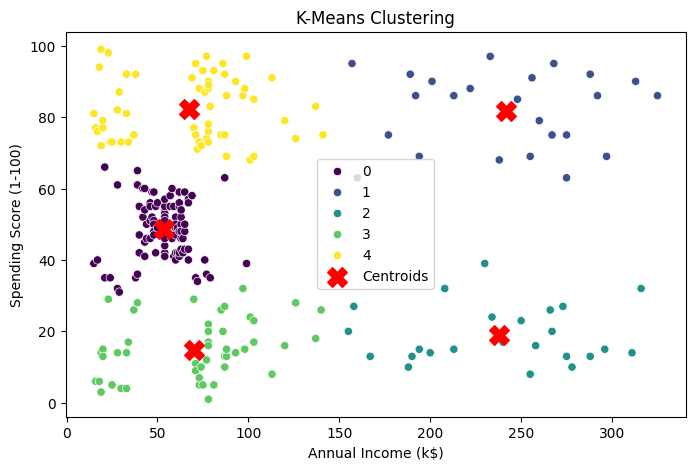

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=kmeans_labels, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            color='red', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('K-Means Clustering')
plt.show()

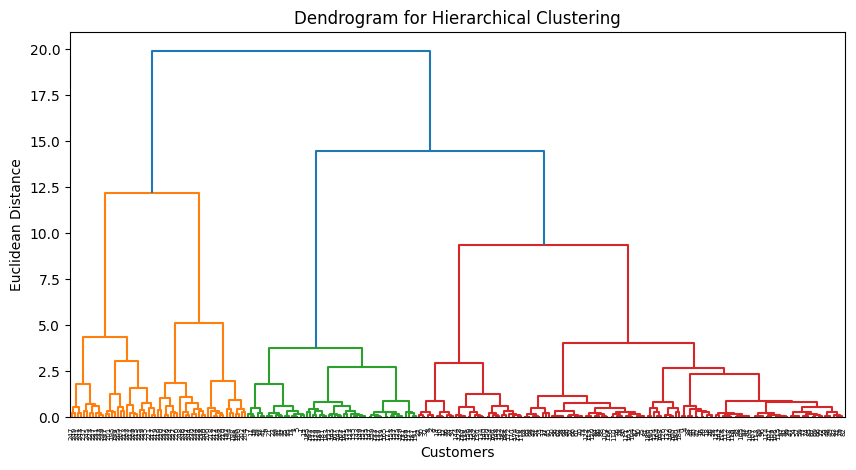

In [16]:
plt.figure(figsize=(10, 5))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [17]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)
df['Agglomerative_Cluster'] = agg_labels

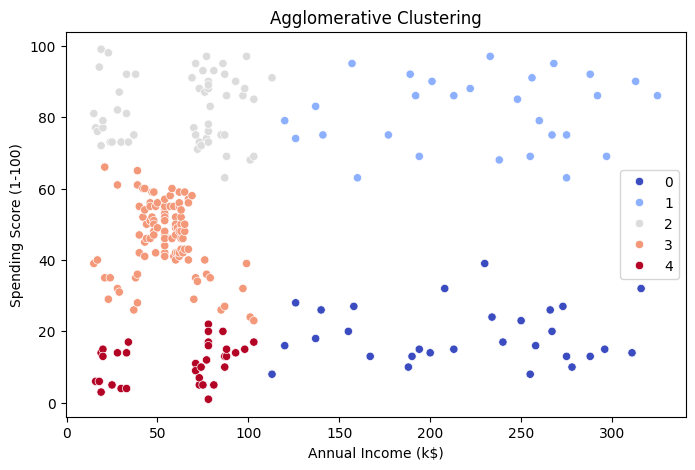

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=agg_labels, palette='coolwarm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering')
plt.show()